# Precision, Recall, True Positive Rate (TPR), and False Positive Rate (FPR)

## Precision
Precision, also known as positive predictive value, is a metric that measures the accuracy of positive predictions made by a classification model. It is defined as the ratio of true positive predictions to the total number of positive predictions (true positives and false positives):

$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$

High precision indicates a low false-positive rate, meaning that when the model predicts a positive outcome, it is likely to be correct.

## Recall
Recall, also known as sensitivity or true positive rate (TPR), measures the ability of a model to capture all relevant instances of a positive class. It is defined as the ratio of true positive predictions to the total number of actual positive instances (true positives and false negatives):

$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$

High recall indicates a low false-negative rate, meaning that the model is effective at identifying positive instances.

## True Positive Rate (TPR)
True Positive Rate, also known as sensitivity or recall, is the ratio of true positive predictions to the total number of actual positive instances. TPR is expressed as a percentage and represents the model's ability to correctly identify positive instances:

$$ \text{TPR} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} \times 100 $$

## False Positive Rate (FPR)
False Positive Rate is the ratio of false positive predictions to the total number of actual negative instances. It is expressed as a percentage and represents the rate of incorrect positive predictions made by the model:

$$ \text{FPR} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}} \times 100 $$

Low FPR indicates a low rate of false positives, which is desirable in many classification tasks.

Understanding and balancing precision, recall, TPR, and FPR is crucial for evaluating and fine-tuning the performance of classification models.


## Example:

|                 | Predicted Positive | Predicted Negative |
| --------------- | ------------------ | ------------------ |
| **Actual Positive** | 25                 | 5                  |
| **Actual Negative** | 10                 | 60                 |



### Precision
$$ \text{Precision} = \frac{25}{25 + 5} = \frac{25}{30} \approx 0.83 $$

This indicates that among the instances predicted as positive, approximately 83% are true positives.

### Recall
$$ \text{Recall} = \frac{25}{25 + 10} = \frac{25}{35} \approx 0.71 $$

This indicates that the model captures approximately 71% of the actual positive instances.

### True Positive Rate (TPR)
$$ \text{TPR} = \frac{25}{25 + 10} \times 100 = \frac{25}{35} \times 100 \approx 71\% $$

### False Positive Rate (FPR)
$$ \text{FPR} = \frac{5}{5 + 60} \times 100 = \frac{5}{65} \times 100 \approx 7.7\% $$

These metrics provide insights into the model's performance, emphasizing the trade-off between precision and recall or TPR and FPR, depending on the specific requirements of the classification task.


In [146]:
from scipy import stats
import matplotlib.pyplot as plt 
import numpy as np

def tpr(y_pred, y_true, threshold):
    tp = np.where(y_pred > threshold, y_true, 0).sum()
    fn = np.where(y_pred <= threshold, y_true, 0).sum()
    
    return tp/(tp+fn)

def fpr(y_pred, y_true, threshold):
    fp = np.where(y_pred > threshold, 1-y_true, 0).sum()
    tn = np.where(y_pred <= threshold, 1-y_true, 0).sum()
    
    return fp/(fp+tn)

def roc(y_pred, y_true, n=100):
    tprs = []
    fprs = []
    thr = []
    for threshold in np.linspace(0, 1, n):
        tpr_t = tpr(y_pred, y_true, threshold)
        fpr_t = fpr(y_pred, y_true, threshold)
        tprs.append(tpr_t)
        fprs.append(fpr_t)
        thr.append(threshold)
    return tprs, fprs, thr

def prec_rec(y_pred, y_true, n=100):
    prec = []
    rec = []
    thr = []
    for threshold in np.linspace(0, 1, n):
        tp = np.where(y_pred > threshold, y_true, 0).sum()
        fp = np.where(y_pred > threshold, 1-y_true, 0).sum()
        fn = np.where(y_pred <= threshold, y_true, 0).sum()
        if (tp + fp) and (tp + fn):
            prec.append(tp/(tp + fp))
            rec.append(tp/(tp + fn))
            thr.append(threshold)
    return prec, rec, thr

def auc_score(y_pred, y_true):
    tprs, fprs, _ = roc(y_pred, y_true)
    tprs = np.array(tprs)
    fprs = np.array(fprs)
    indexes = np.argsort(fprs)
    tprs = tprs[indexes]
    fprs = fprs[indexes]
    n = len(tprs)
    auc_score = 0
    for i in range(1, n):
        auc_score += 0.5*(tprs[i] + tprs[i-1])*(fprs[i] - fprs[i-1])
    return auc_score

def generate_scores(overlap_pcnt, n_samples=[200, 200]):
    x_overlap = 0.5
    z = stats.norm.ppf(0.999)
    sigma = (x_overlap - 0.25)/z

    z_a = stats.norm.ppf(1-overlap_pcnt/2)
    mu_1 = x_overlap - z_a*sigma 
    mu_2 = x_overlap + z_a*sigma
    tp = stats.norm.rvs(loc=mu_2, scale=sigma, size=n_samples[0])
    y_p = np.ones_like(tp)
    tn = stats.norm.rvs(loc=mu_1, scale=sigma, size=n_samples[1])
    y_n = np.zeros_like(tn)
    x = np.hstack([tp, tn])
    y = np.hstack([y_p, y_n])
    x = np.clip(x, 0, 1)
    return  x, y


In [147]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score


def plot_all(distances, n_samples=[500, 500]):
    n_plots = len(distances)

    # Create a single subplot for all ROC curves
    plt.figure(figsize=(10, 8))

    for i, dist in enumerate(distances):
        y_pred, y_true = generate_scores(dist, n_samples=n_samples)

        # Separate x values based on y values
        x0 = y_pred[y_true == 0]
        x1 = y_pred[y_true == 1]

        # Create a bar plot with different colors for each category
        plt.subplot(n_plots, 3, i * 3 + 1)
        plt.hist(x0, color='blue', alpha=0.5, label='y=0')
        plt.hist(x1, color='red', alpha=0.5, label='y=1')
        plt.title(f'Distribution of Scores')
        plt.legend(loc="upper right")

        tprs, fprs, thresholds = roc(y_pred, y_true)
        precs, recalls, _ = prec_rec(y_pred, y_true) #precision_recall_curve(y_true, y_pred)

        # Plot ROC curve
        plt.subplot(n_plots, 3, i * 3 + 2)
        plt.plot(fprs, tprs, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc(fprs, tprs):.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve')
        plt.legend(loc="lower right")
        plt.xlim([-0.01, 1.0])
        plt.ylim([0.0, 1.05])

        # Plot the ROC curve
        plt.subplot(n_plots, 3, i * 3 + 3)
        plt.plot(recalls, precs, color='darkorange', lw=2, label=f'Precision-Recall')
        plt.xlim([-0.01, 1.01])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall')
        plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()


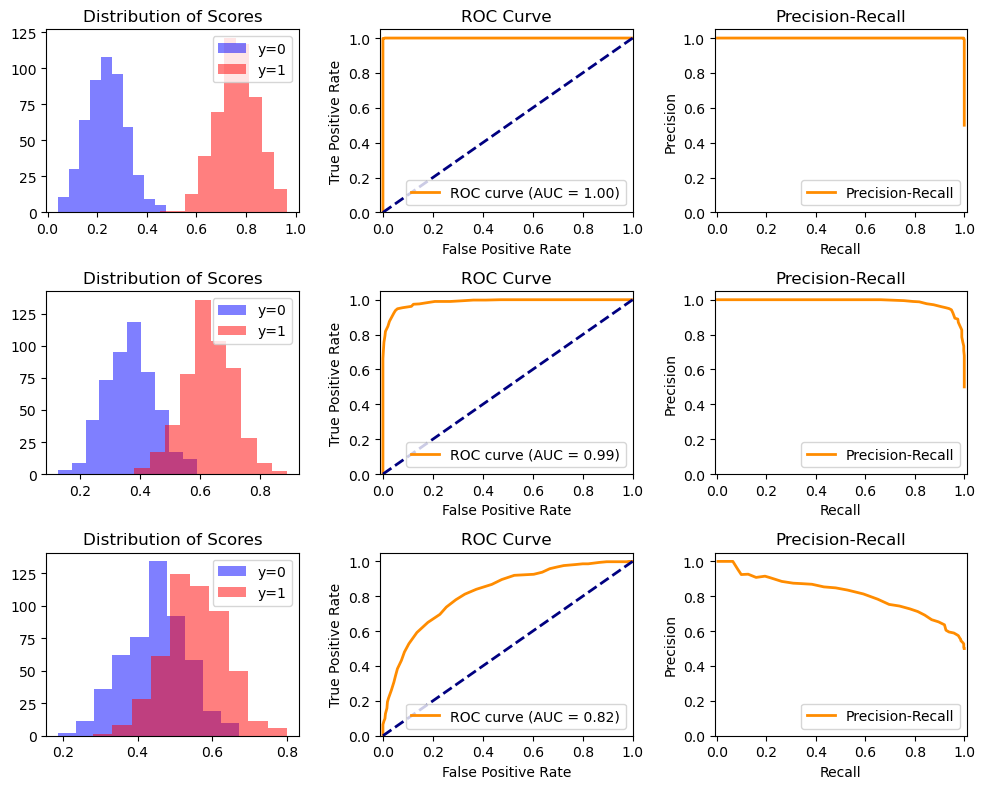

In [149]:
plot_all([0.001, 0.1, 0.5], n_samples=[500, 500])


### For imbalanced classes:

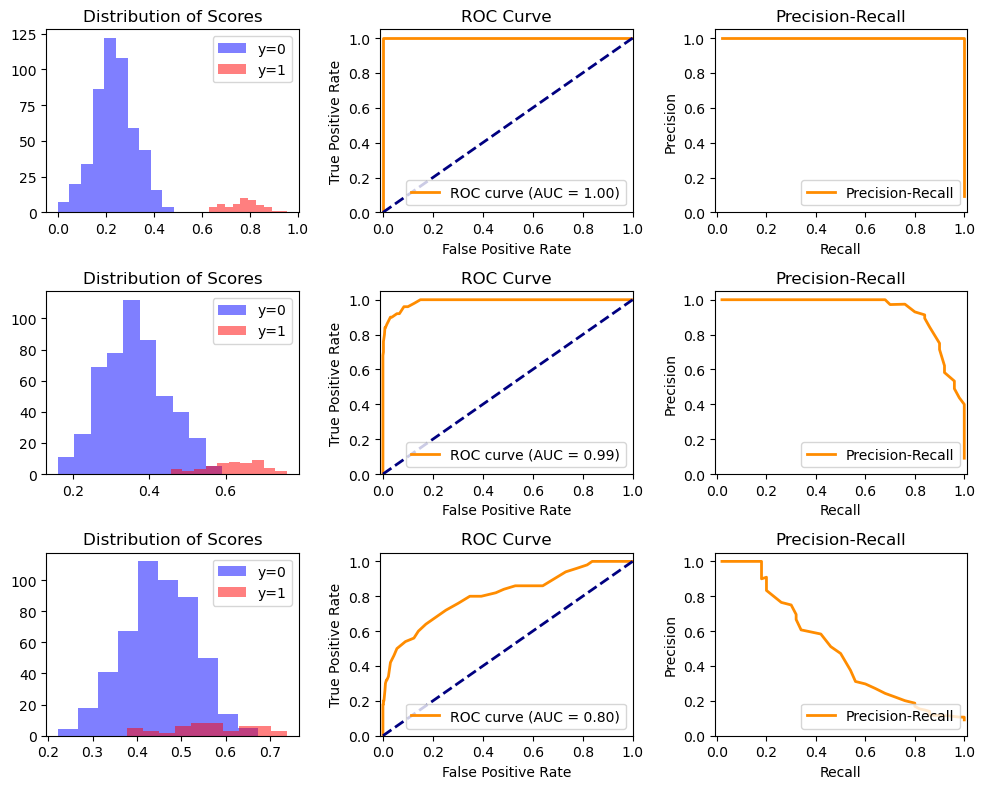

In [150]:
plot_all([0.001, 0.1, 0.5], n_samples=[50, 500])

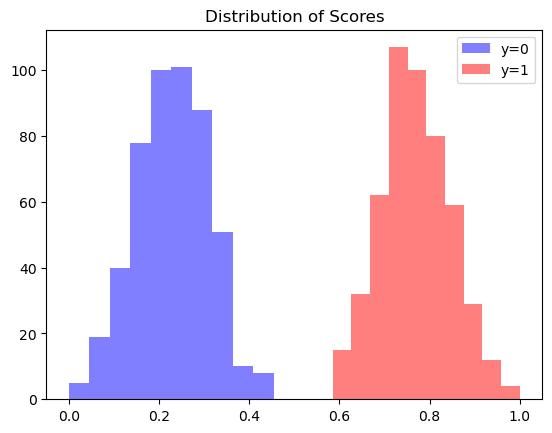

threshold: 0.000 precision: 0.500 recall: 1.000
threshold: 0.026 precision: 0.501 recall: 1.000
threshold: 0.030 precision: 0.501 recall: 1.000
threshold: 0.034 precision: 0.502 recall: 1.000
threshold: 0.043 precision: 0.502 recall: 1.000
threshold: 0.048 precision: 0.503 recall: 1.000
threshold: 0.049 precision: 0.503 recall: 1.000
threshold: 0.049 precision: 0.504 recall: 1.000
threshold: 0.054 precision: 0.504 recall: 1.000
threshold: 0.060 precision: 0.505 recall: 1.000
threshold: 0.062 precision: 0.505 recall: 1.000
threshold: 0.063 precision: 0.506 recall: 1.000
threshold: 0.064 precision: 0.506 recall: 1.000
threshold: 0.065 precision: 0.507 recall: 1.000
threshold: 0.072 precision: 0.507 recall: 1.000
threshold: 0.077 precision: 0.508 recall: 1.000
threshold: 0.078 precision: 0.508 recall: 1.000
threshold: 0.079 precision: 0.509 recall: 1.000
threshold: 0.082 precision: 0.509 recall: 1.000
threshold: 0.082 precision: 0.510 recall: 1.000
threshold: 0.083 precision: 0.510 recall

In [151]:
y_pred, y_true = generate_scores(0.001, n_samples=[500, 500])
# Separate x values based on y values
x0 = y_pred[y_true == 0]
x1 = y_pred[y_true == 1]

# Create a bar plot with different colors for each category

plt.hist(x0, color='blue', alpha=0.5, label='y=0')
plt.hist(x1, color='red', alpha=0.5, label='y=1')
plt.title(f'Distribution of Scores')
plt.legend(loc="upper right")
plt.show()

tprs, fprs, thresholds = roc(y_pred, y_true)
precs, recalls, thresholds = precision_recall_curve(y_true, y_pred)
for prec, rec, thr in zip(precs, recalls, thresholds):
    print(f'threshold: {thr:2.3f} precision: {prec:2.3f} recall: {rec:2.3f}')